In [1]:
import pandas as pd 
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

## Drought Cleaning

In [2]:
drought_df = pd.read_csv(r"C:\Users\Kamalachandran\Desktop\Intern\task\task 5\Drought.csv")
drought_df.head()

,coordinates,name,description,htmldescription,alertlevel,alertscore,episodealertlevel,episodealertscore,country,fromdate,...,severitytext,source,iso3,eventtype,GDACS ID,Name,Countries,Start Date,Duration,Impact
0,"[11.087, 53.882]","Drought in Germany, Denmark, France, Latvia, P...","Drought in Germany, Denmark, France, Latvia, P...","Green Drought in Germany, Denmark, France, Lat...",Green,1,Green,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21T00:00:00,...,Minor impact for agricultural drought in 80936...,GDO,DEU,DR,DR 1012168,Central Northern Europe-2018,"Germany, Denmark, France, Latvia, Poland, Sweden",End of Jul 2017,569 days (at 18 Feb 2019),Minor impact for agricultural drought in 80936...
1,"[11.087, 53.882]","Drought in Germany, Denmark, France, Latvia, P...","Drought in Germany, Denmark, France, Latvia, P...","Green Drought in Germany, Denmark, France, Lat...",Green,1,Green,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21T00:00:00,...,Minor impact for agricultural drought in 80936...,GDO,DEU,DR,DR 1012168,Central Northern Europe-2018,"Germany, Denmark, France, Latvia, Poland, Sweden",End of Jul 2017,569 days (at 18 Feb 2019),Minor impact for agricultural drought in 80936...
2,"[11.087, 53.882]","Drought in Germany, Denmark, France, Latvia, P...","Drought in Germany, Denmark, France, Latvia, P...","Green Drought in Germany, Denmark, France, Lat...",Green,1,Green,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21T00:00:00,...,Minor impact for agricultural drought in 80936...,GDO,DEU,DR,DR 1012168,Central Northern Europe-2018,"Germany, Denmark, France, Latvia, Poland, Sweden",End of Jul 2017,569 days (at 18 Feb 2019),Minor impact for agricultural drought in 80936...
3,"[11.087, 53.882]","Drought in Germany, Denmark, France, Latvia, P...","Drought in Germany, Denmark, France, Latvia, P...","Green Drought in Germany, Denmark, France, Lat...",Green,1,Green,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21T00:00:00,...,Minor impact for agricultural drought in 80936...,GDO,DEU,DR,DR 1012168,Central Northern Europe-2018,"Germany, Denmark, France, Latvia, Poland, Sweden",End of Jul 2017,569 days (at 18 Feb 2019),Minor impact for agricultural drought in 80936...
4,"[11.087, 53.882]","Drought in Germany, Denmark, France, Latvia, P...","Drought in Germany, Denmark, France, Latvia, P...","Green Drought in Germany, Denmark, France, Lat...",Green,1,Green,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21T00:00:00,...,Minor impact for agricultural drought in 80936...,GDO,DEU,DR,DR 1012168,Central Northern Europe-2018,"Germany, Denmark, France, Latvia, Poland, Sweden",End of Jul 2017,569 days (at 18 Feb 2019),Minor impact for agricultural drought in 80936...


In [3]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   coordinates        1780 non-null   object 
 1   name               1780 non-null   object 
 2   description        1780 non-null   object 
 3   htmldescription    1780 non-null   object 
 4   alertlevel         1780 non-null   object 
 5   alertscore         1780 non-null   int64  
 6   episodealertlevel  1780 non-null   object 
 7   episodealertscore  1780 non-null   float64
 8   country            1780 non-null   object 
 9   fromdate           1780 non-null   object 
 10  todate             1780 non-null   object 
 11  severity           1780 non-null   float64
 12  severitytext       1780 non-null   object 
 13  source             1780 non-null   object 
 14  iso3               1780 non-null   object 
 15  eventtype          1780 non-null   object 
 16  GDACS ID           1780 

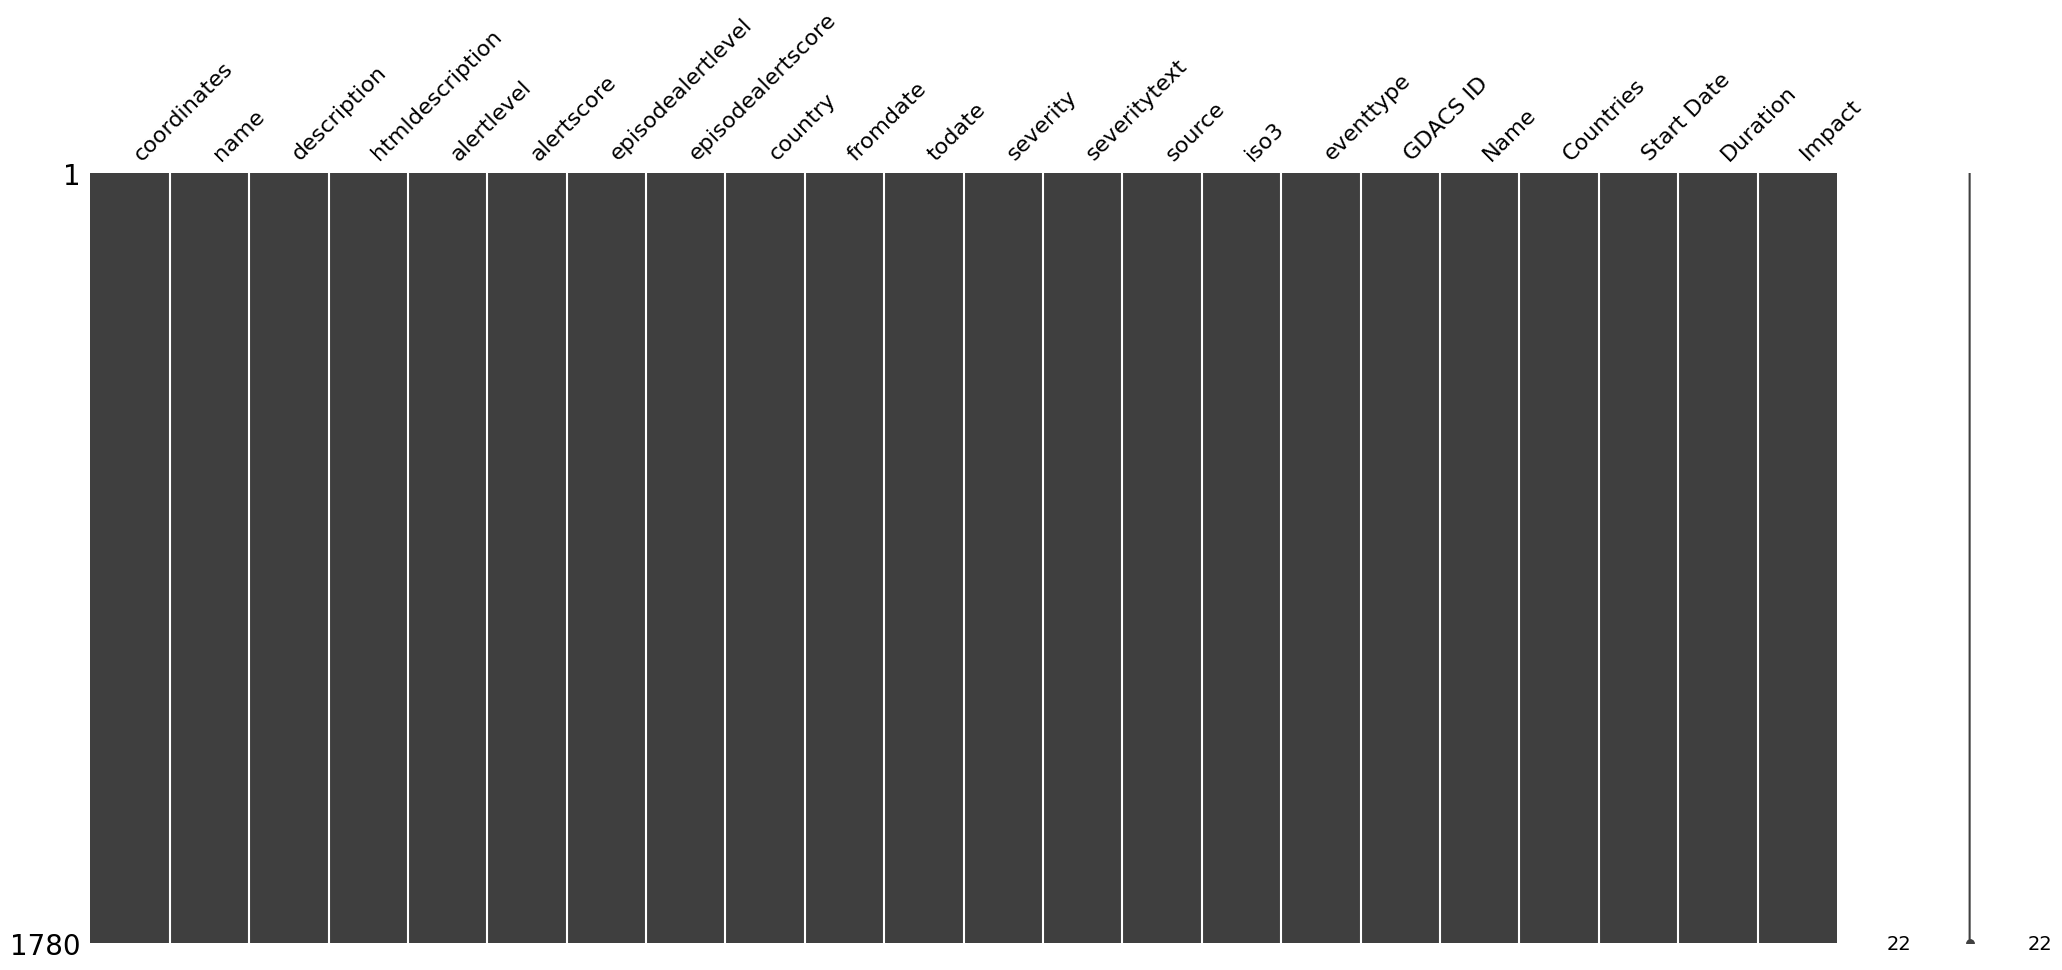

In [4]:
msn.matrix(drought_df);

In [5]:
#Check for duplicate rows
duplicate_rows = drought_df.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

print("Shape of DataFrame Before Removing Duplicates: ", drought_df.shape)

# Drop the duplicates
drought_df = drought_df.drop_duplicates()

# Checking the shape of the data after dropping duplicates
print("Shape of DataFrame After Removing Duplicates: ", drought_df.shape)

Number of duplicate rows: 1540
Shape of DataFrame Before Removing Duplicates:  (1780, 22)
Shape of DataFrame After Removing Duplicates:  (240, 22)


In [6]:
drought_df.drop(['name', 'description', 'Name'], axis=1, inplace=True)
drought_df = drought_df.rename(columns={"htmldescription": "description"})

In [7]:
drought_df.drop(['Countries'], axis=1, inplace=True)

In [8]:
print(f"Same value count between 'severitytext' and 'Impact' (must be 1780): {(drought_df['severitytext'] 
                                                                               == drought_df['Impact']).sum()}")

drought_df.drop(['severitytext'], axis=1, inplace=True)

Same value count between 'severitytext' and 'Impact' (must be 1780): 240


In [9]:
print(f"Same value count between 'alertlevel' and 'episodealertlevel' (must be 1780): {(drought_df['alertlevel'] 
                                                                                == drought_df['episodealertlevel']).sum()}")

drought_df.drop(['episodealertlevel'], axis=1, inplace=True)

Same value count between 'alertlevel' and 'episodealertlevel' (must be 1780): 240


In [10]:
drought_df.drop(['Start Date'], axis=1, inplace=True)

In [11]:
drought_df['Duration'] = drought_df['Duration'].str.split('(').str[0].str.split().str[0]
drought_df = drought_df.rename(columns={"Duration": "Duration (Days)"})

In [12]:
drought_df = drought_df.rename(columns={"severity": "severity (km2)"})

In [13]:
longitude = []
latitude = []
for i in drought_df['coordinates']:
    longitude.append(i.split(',')[0][1:].strip())
    latitude.append(i.split(',')[1][:-1].strip())

drought_df['longitude'] = longitude
drought_df['latitude'] = latitude
drought_df.drop(['coordinates'], axis=1, inplace=True)

In [14]:
for c in drought_df.columns:
    print(f"Unique values count. Column: {c} | Count: {drought_df[c].nunique()}")

Unique values count. Column: description | Count: 240
Unique values count. Column: alertlevel | Count: 3
Unique values count. Column: alertscore | Count: 3
Unique values count. Column: episodealertscore | Count: 10
Unique values count. Column: country | Count: 129
Unique values count. Column: fromdate | Count: 92
Unique values count. Column: todate | Count: 133
Unique values count. Column: severity (km2) | Count: 237
Unique values count. Column: source | Count: 1
Unique values count. Column: iso3 | Count: 77
Unique values count. Column: eventtype | Count: 1
Unique values count. Column: GDACS ID | Count: 240
Unique values count. Column: Duration (Days) | Count: 130
Unique values count. Column: Impact | Count: 237
Unique values count. Column: longitude | Count: 239
Unique values count. Column: latitude | Count: 235


In [15]:
print(drought_df[['source', 'eventtype']].head())
drought_df.drop(['source', 'eventtype'], axis=1, inplace=True)

   source eventtype
0     GDO        DR
5     GDO        DR
7     GDO        DR
13    GDO        DR
18    GDO        DR


In [16]:
drought_df[['alertscore', 'episodealertscore', 'severity (km2)', 'Duration (Days)',
            'longitude', 'latitude']] = drought_df[['alertscore', 'episodealertscore', 'severity (km2)', 
                                                    'Duration (Days)', 'longitude', 'latitude']].astype('float')
drought_df[['fromdate', 'todate']] = drought_df[['fromdate', 'todate']].apply(pd.to_datetime)

In [17]:
drought_df.dtypes

description                  object
alertlevel                   object
alertscore                  float64
episodealertscore           float64
country                      object
fromdate             datetime64[ns]
todate               datetime64[ns]
severity (km2)              float64
iso3                         object
GDACS ID                     object
Duration (Days)             float64
Impact                       object
longitude                   float64
latitude                    float64
dtype: object

In [18]:
drought_df.columns = drought_df.columns.str.capitalize()

In [19]:
drought_df.to_csv("Drought_clean.csv", index=False)

In [20]:
print(drought_df['Alertlevel'].value_counts())
print("------------------------------------")
print(drought_df['Country'].value_counts())
print("------------------------------------")
print(drought_df['Iso3'].value_counts())

Alertlevel
Green     198
Orange     36
Red         6
Name: count, dtype: int64
------------------------------------
Country
United States                                                                                                    12
Brazil                                                                                                           11
Australia                                                                                                        10
China                                                                                                             7
Russia                                                                                                            7
                                                                                                                 ..
Afghanistan, Islamic Republic of Iran, Kyrgyzstan, Kazakhstan, Pakistan, Tajikistan, Turkmenistan, Uzbekistan     1
Austria, Belgium, Czech Republic, Germany, Denmark, France, Luxe

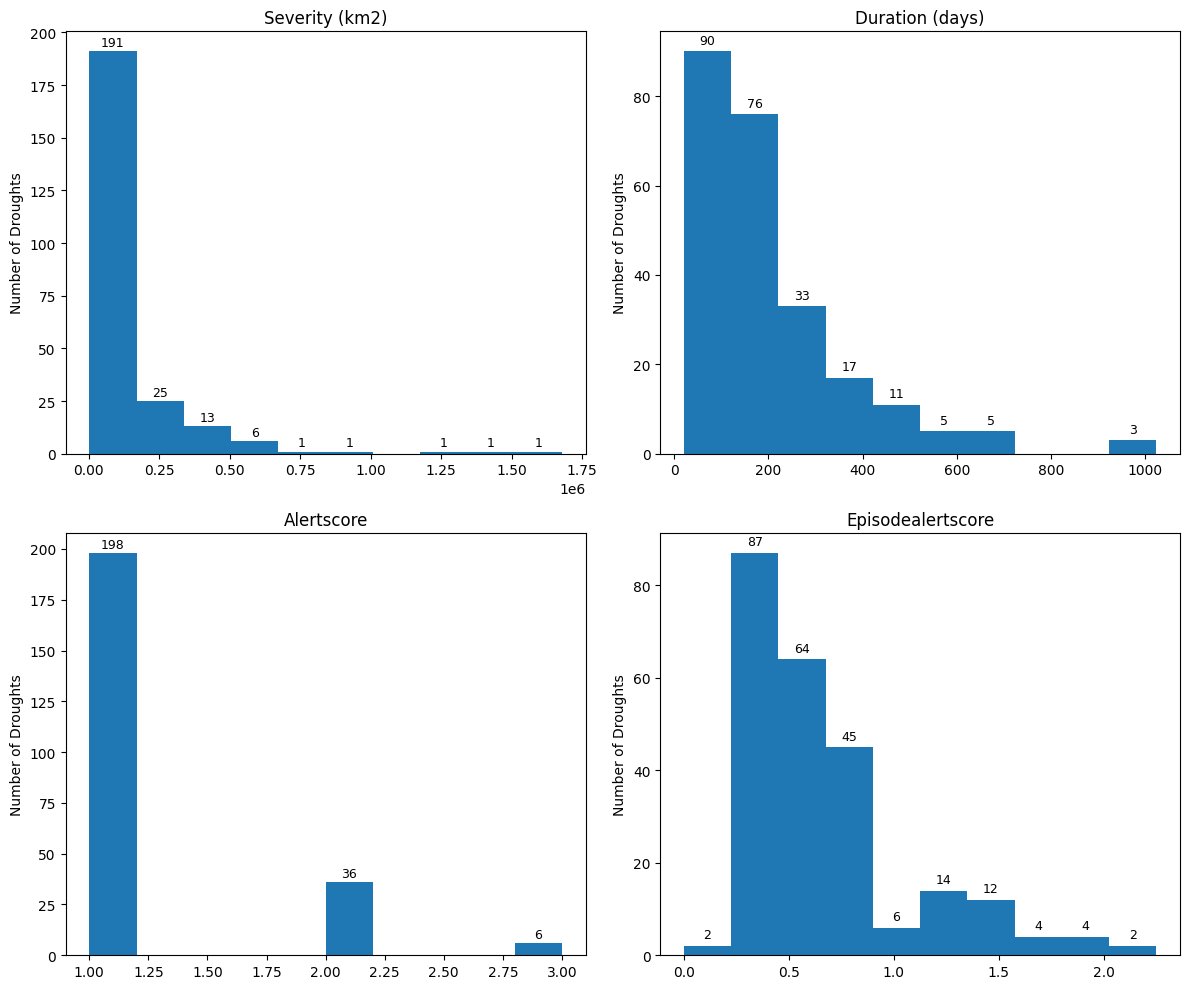

In [21]:
cols = ['Severity (km2)', 'Duration (days)', 'Alertscore', 'Episodealertscore']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    counts, bins, patches = axes[i].hist(drought_df[col])
    axes[i].set_ylabel("Number of Droughts")
    axes[i].set_title(col)

    for count, patch in zip(counts, patches):
        height = patch.get_height()
        if height > 0:  # show only if bar exists
            axes[i].text(patch.get_x() + patch.get_width()/2, height + 1, str(int(height)),
                         ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("charts/severity_histogram.png")
plt.show()

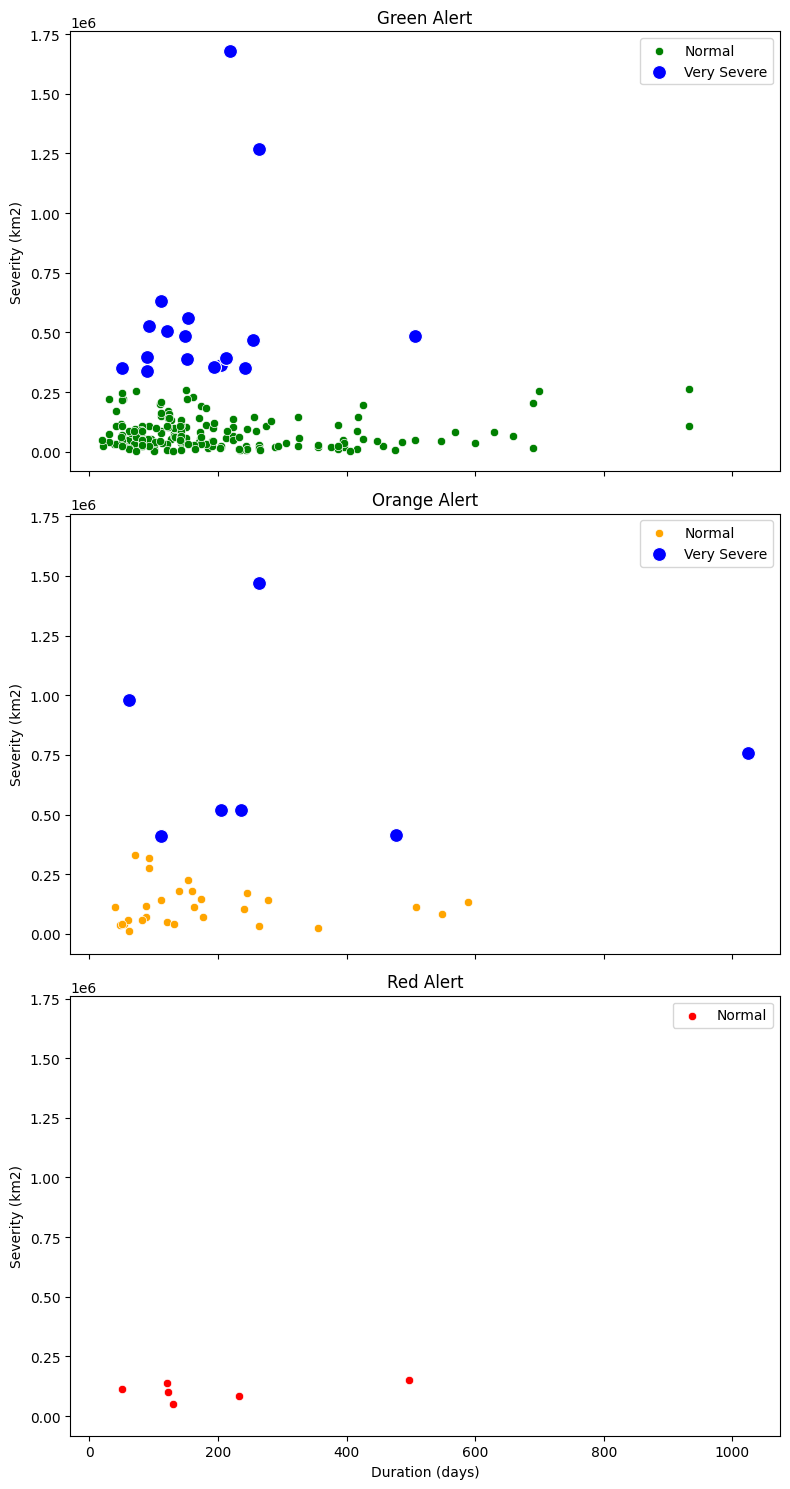

In [22]:
alert_levels = ['Green', 'Orange', 'Red']
colors = ['green', 'orange', 'red']

severity_threshold = drought_df['Severity (km2)'].quantile(0.9)

fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharex=True, sharey=True)

for i in range(3):
    # Filter data for the current alert level
    data = drought_df[drought_df['Alertlevel'] == alert_levels[i]]
    
    # Split into normal and very severe
    normal = data[data['Severity (km2)'] <= severity_threshold]
    severe = data[data['Severity (km2)'] > severity_threshold]
    
    # Plot normal points
    sns.scatterplot(x='Duration (days)', y='Severity (km2)', data=normal, color=colors[i], ax=axes[i], label='Normal')
    
    # Highlight very severe points
    sns.scatterplot(x='Duration (days)', y='Severity (km2)', data=severe, color='blue', s=100, ax=axes[i], label='Very Severe')
    
    axes[i].set_title(f"{alert_levels[i].capitalize()} Alert")
    axes[i].legend()

plt.tight_layout()
plt.savefig("charts/scatter_duration_severity.png")
plt.show()

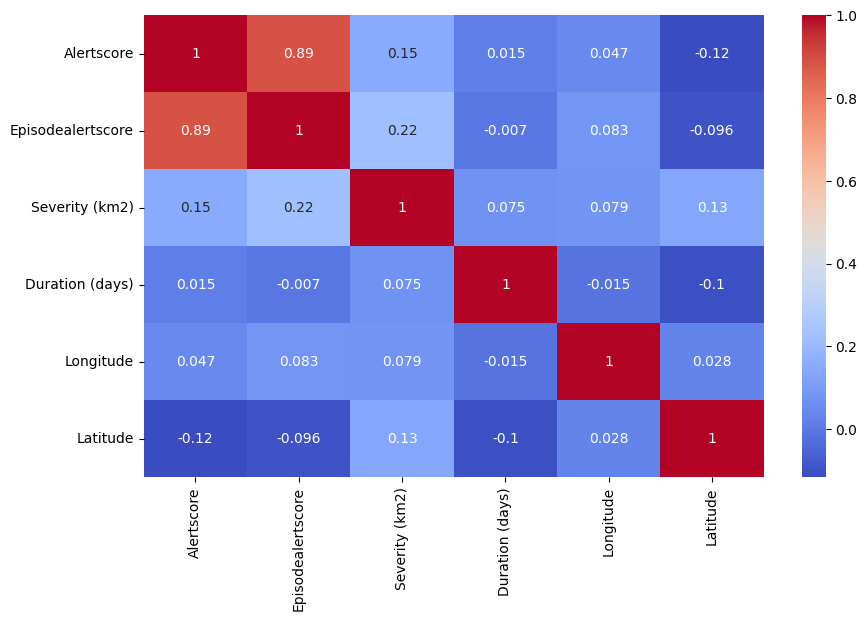

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(drought_df[['Alertscore','Episodealertscore','Severity (km2)','Duration (days)','Longitude','Latitude']].corr(),
            annot=True, cmap="coolwarm")
plt.savefig("charts/correlation_heatmap.png")
plt.show()

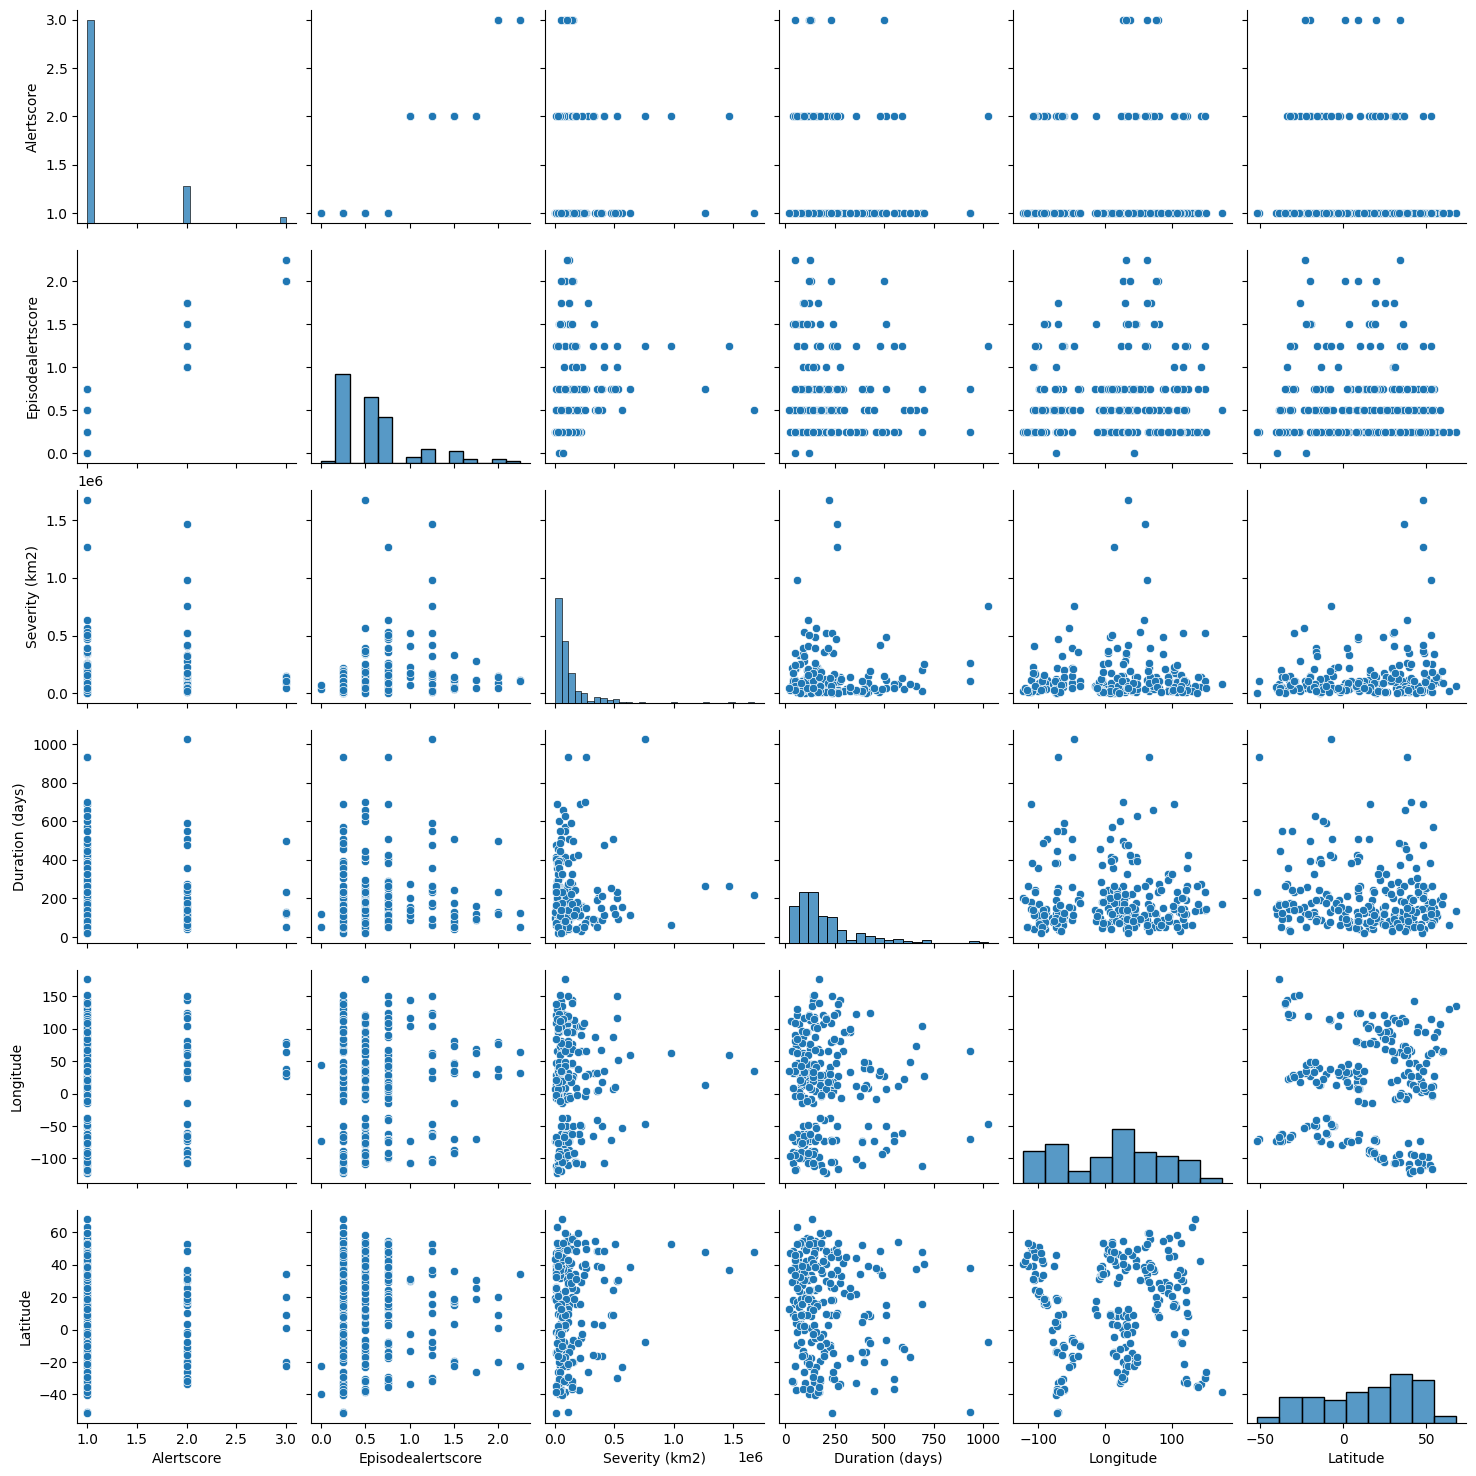

In [24]:
sns.pairplot(drought_df[['Alertscore','Episodealertscore','Severity (km2)','Duration (days)','Longitude','Latitude']])
plt.savefig("charts/pairplot_drought.png")
plt.show()